##**Tugas 5**

##**Klasifikasi dengan Naive Bayes**

Nama    : Muhamad Helmi Adhfandi

NIM     : A11.2022.14160

Kelompok  : A11.4510

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
dataset = pd.read_csv("gender_classification_v7.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [37]:
y = np.where(y == 'Male', 1, 0)

In [38]:
print(x)

[[6.1 1. ]
 [5.4 0. ]
 [6.3 1. ]
 ...
 [5.7 0. ]
 [6.2 0. ]
 [5.4 1. ]]


In [39]:
print(y)

[1 0 1 ... 0 0 1]


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [41]:
print(x_train)

[[5.1 1. ]
 [6.4 0. ]
 [6.4 1. ]
 ...
 [6.2 0. ]
 [6.8 1. ]
 [5.7 0. ]]


In [42]:
print(x_test)

[[5.1 0. ]
 [5.7 1. ]
 [5.5 0. ]
 ...
 [6.4 1. ]
 [5.9 1. ]
 [5.9 0. ]]


In [43]:
print(y_train)

[0 0 1 ... 0 1 0]


In [44]:
print(y_test)

[0 1 1 ... 1 1 0]


In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [46]:
print(x_train)

[[-1.54246808  0.9989339 ]
 [ 0.84052412 -1.00106724]
 [ 0.84052412  0.9989339 ]
 ...
 [ 0.47390994 -1.00106724]
 [ 1.57375249  0.9989339 ]
 [-0.44262553 -1.00106724]]


In [47]:
print(x_test)

[[-1.54246808 -1.00106724]
 [-0.44262553  0.9989339 ]
 [-0.80923971 -1.00106724]
 ...
 [ 0.84052412  0.9989339 ]
 [-0.07601134  0.9989339 ]
 [-0.07601134 -1.00106724]]


In [48]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [49]:
y_pred = classifier.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[571  71]
 [ 87 522]]


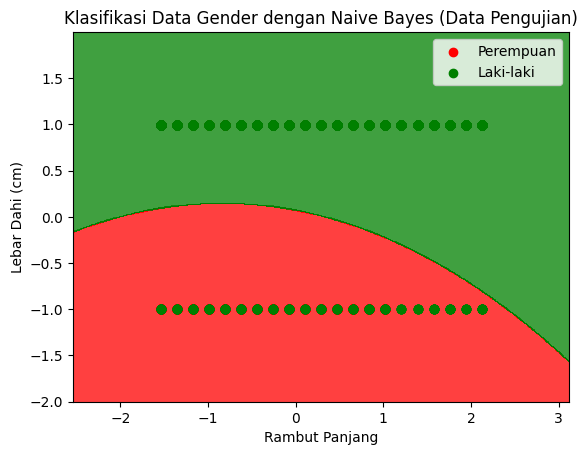

In [54]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min()-1, stop=x_set[:, 1].max() + 1, step=0.01))

predicted_labels = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T)
predicted_labels = predicted_labels.reshape(x1.shape)

plt.contourf(x1, x2, predicted_labels, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('red', 'green'))(i), label='Laki-laki' if j == 1 else 'Perempuan')

plt.title('Klasifikasi Data Gender dengan Naive Bayes (Data Pengujian)')
plt.xlabel('Rambut Panjang')
plt.ylabel('Lebar Dahi (cm)')
plt.legend()
plt.show()